# Blending and pasting Images with openCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [2]:
img1 = cv2.imread('DATA/dog_backpack.jpg')
img2 = cv2.imread('DATA/watermark_no_copy.png')

# convert to correct colors BGR2RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

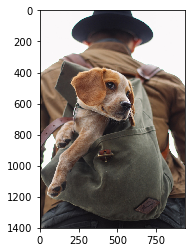

In [3]:
plt.imshow(img1)

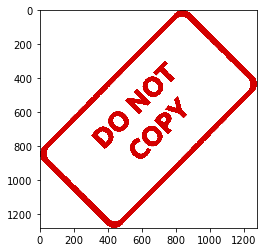

In [4]:
plt.imshow(img2)

# Blending same sized images

The two sample images are originally of different sizes. In order to demnstrate the use of the blending function we need to have images of the same size. This means we will convert both and the most affected one will look skewed, but remain acceptable for the purpose of the exercise.

key takeaway: 
- the `addWeighted` function only works with images of the exact same dimensions.

In [41]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

In [42]:
# here you can mix and match the alpha and beta va;ues between 0 & 1 
# to get to the desired result of thsi approach. In the sample you can 
# see the weights have left the main source picture as looking a little 
# faded or washed out. 

blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)

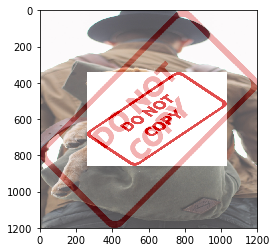

In [43]:
plt.imshow(blended)

# Working with differently sized images (no Blend)

We don't actually _blend_ in this case, effectively we will overlay. We use a numpy reassignment of one image array overlaid on the other.

### Refresh the Data

In [44]:
img1 = cv2.imread('DATA/dog_backpack.jpg')
img2 = cv2.imread('DATA/watermark_no_copy.png')

# convert to correct colors BGR2RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [45]:
# resize image 2 to make it smaller
# operation does not remove the 3 channels
img2 = cv2.resize(img2, (600,600))

(600, 600, 3)


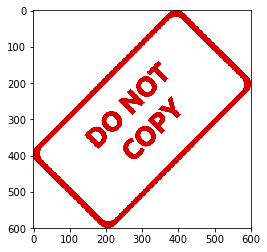

In [78]:
# check the image is now (600, 600, 3)
plt.imshow(img2)
print(img2.shape)

In [47]:
# label for clarity 
large_img = img1
small_img = img2

In [48]:
# create the starting position
x_offset = 200
y_offset = 400

In [49]:
# derive the ending position
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [50]:
large_img[y_offset : y_end, x_offset : x_end] = small_img

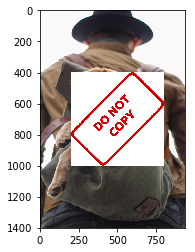

In [52]:
plt.imshow(large_img)

# Blending with different sized images

In [113]:
# refresh the original loaded images 

img1 = cv2.imread('DATA/dog_backpack.jpg')
img2 = cv2.imread('DATA/watermark_no_copy.png')

# convert to correct colors BGR2RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [114]:
# resize image 2 to make it smaller
img2 = cv2.resize(img2, (600,600))

In [115]:
# step 1 - calculate offsets

# for Bottom right ROI placement: 
# get the x-axis 
# x_offset = img1.shape[1] - img2.shape[1]
# y_offset = img1.shape[0] - img2.shape[0]


# alternate for centering 
x_offset = 200
y_offset = 400


In [117]:
rows, columns, channels = img2.shape
print(rows, columns, channels)

600 600 3


In [120]:
# Step 2 - Grab the ROI (Region of Interest) from larger imaage

# for bottom right placement
# set the area from the offset to the last point of 
# each of the axes 
#roi = img1[y_offset:img1.shape[0], x_offset: img1.shape[1]]
#print(roi.shape)

# for a more centered placement
roi = img1[y_offset: y_offset + img2.shape[0], x_offset: x_offset + img2.shape[1]]
print(roi.shape)


(600, 600, 3)


(600, 600, 3)


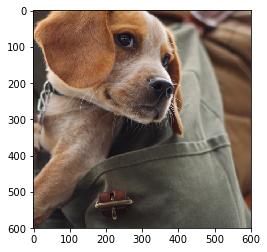

In [122]:
# checkpoint - reveal the roi

# we are going to use this to overaly the mask eventually
# and once overlaid, we'll reapply this updated section of
# the entire image and display the 'blended' version.
plt.imshow(roi)
print(roi.shape)

(600, 600)


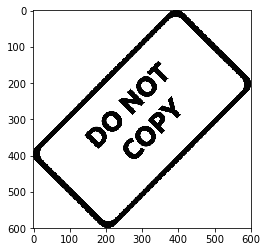

In [123]:
# Step 3 - Create the mask 

# get a grayscale copy of the image
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# check the result
plt.imshow(img2gray, cmap='gray')
print(img2gray.shape)

# you can see the shape is a 600,600 tuple.

(600, 600)


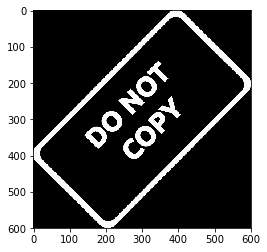

In [124]:
# we need the negative of the image 

# use a bitwise operation to invert the image
mask_inv = cv2.bitwise_not(img2gray)

# check result 
plt.imshow(mask_inv, cmap='gray')
print(mask_inv.shape)

# again we have a 600, 600 tuple as the shape.

In [125]:
# create a 3 channel version. 
# new image is created in the shape of img2 (600,600,3)
# np.full takes the value 255, maximum value n a color channel 
# and maximum uint8 possible value.
# everything set to 255 across the RGB creates a white pixel.
white_background = np.full(img2.shape, 255, dtype=np.uint8)
print(white_background.shape)

(600, 600, 3)


In [126]:
# we pass in tw sources and the mask
# this will result in a shape equivalent to
# the param for the mask.
# the result is a 3 channel image with the mask 
# applied across all channels evenly, uniformally
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

(600, 600, 3)


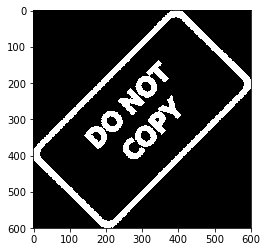

In [127]:
plt.imshow(bk)
print(bk.shape)

In [128]:
# place the original forground on top of the image
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

(600, 600, 3)


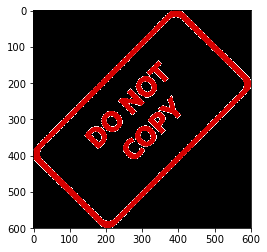

In [129]:
plt.imshow(fg)
print(fg.shape)

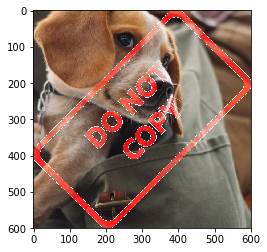

In [130]:
# blend images 
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

In [131]:
large_img = img1
small_img = final_roi

# Add the final roi image to the original image
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset + small_img.shape[1] ] = small_img

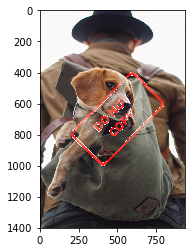

In [132]:
plt.imshow(large_img)